In [2]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "A.N.Other@example.com"
import pandas as pd
import xml.etree.ElementTree as ET
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import numpy as np

### Задание 4. 
Используя базу данных NCBI Protein, узнайте, есть ли у белка, который кодирует выбранный на первом занятии ген, известная 3D-структура. Добавьте в таблицу переменную Yes/No, в зависимости от результатов поиска.

Посредством AlphaFold предскажите структуру белка, если она неизвестна. Если известна, найдите белок с неизвестной структурой и предскажите его 3D-структуру, воспользовавшись AlphaFold.

In [4]:
genes_df = pd.read_csv('genes2.csv')
genes_df.T

,0,1,2,3,4,5,6,7,8,9,10,11
gen,790,1723,2056,3040,3043,3934,7036,7037,7372,8912,57817,109580095
gene_id,568815596,568815582,568815591,568815582,568815587,568815589,568815591,568815595,568815595,568815582,568815579,568815587
geneSymbol,CAD,DHODH,EPO,HBA2,HBB,LCN2,TFR2,TFRC,UMPS,CACNA1H,HAMP,HBB-LCR
nucleotide,NC_000002.12,NC_000016.10,NC_000007.14,NC_000016.10,NC_000011.10,NC_000009.12,NC_000007.14,NC_000003.12,NC_000003.12,NC_000016.10,NC_000019.10,NC_000011.10
start,27217368,72008743,100720467,172875,5225463,128149452,100620419,196049283,124730451,1153105,35282527,5269924
end,27243943,72027659,100723700,173710,5227071,128153453,100641552,196082090,124749273,1221768,35285143,5304186
strand,plus,plus,plus,plus,minus,plus,minus,minus,plus,plus,plus,plus
gene_lenght,26575,18916,3233,835,1608,4001,21133,32807,18822,68663,2616,34262
gene_seq,AGTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCC...,GGGCTTAATGACGGAAGGAGCATGGCGTGGAGACACCTGAAAGTGA...,CCTTTCCCAGATAGCACGCTCCGCCAGTCCCAAGGGTGCGCAACCG...,ACTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTG...,ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGA...,ACTCGCCACCTCCTCTTCCACCCCTGCCAGGCCCAGCAGCCACCAC...,ATCGCTGGGGGACAGCCTGCAGGCTTCAGGAGGGGACACAAGCATG...,AGAGCGTCGGGATATCGGGTGGCGGCTCGGGACGGAGGACGCGCTA...,CAAACAGGCAGCGCGCGACAATGGCGGTCGCTCGTGCAGCTTTGGG...,AGCCCGAAGTTTCCTGCGCCGCGCGCGGACGGGCTCGAGGCTCGCT...,ACCAGAGCAAGCTCAAGACCCAGCAGTGGGACAGCCAGACAGACGG...,CTGTGTCGGAAGCAGATATGTGCTGCTGCCTCTCTGTCTGGCCTTT...
trancripts_count,6,4,1,1,1,3,2,10,1,16,1,0


In [38]:
#Найдем общее колиечство известных структур белка для каждого из генов в нашей таблице. 
def find_structure(df):
    structures = {}
    for i in range(len(df)):
        handle = Entrez.esearch(db="structure", term=f"{df.loc[i]['geneSymbol']}[Gene Name] AND human[Organism]", idtype='acc')
        answer = Entrez.read(handle)['Count']
        structures[df.loc[i]['geneSymbol']]=answer
    return structures

structures = find_structure(genes_df)

In [37]:
#добавим количество известных структур  в датафрейм
genes_df=pd.concat([genes_df, pd.DataFrame({'structures_count' : [v for v in structures.values()]})], axis=1)
genes_df.T

,0,1,2,3,4,5,6,7,8,9,10,11
gen,790,1723,2056,3040,3043,3934,7036,7037,7372,8912,57817,109580095
gene_id,568815596,568815582,568815591,568815582,568815587,568815589,568815591,568815595,568815595,568815582,568815579,568815587
geneSymbol,CAD,DHODH,EPO,HBA2,HBB,LCN2,TFR2,TFRC,UMPS,CACNA1H,HAMP,HBB-LCR
nucleotide,NC_000002.12,NC_000016.10,NC_000007.14,NC_000016.10,NC_000011.10,NC_000009.12,NC_000007.14,NC_000003.12,NC_000003.12,NC_000016.10,NC_000019.10,NC_000011.10
start,27217368,72008743,100720467,172875,5225463,128149452,100620419,196049283,124730451,1153105,35282527,5269924
end,27243943,72027659,100723700,173710,5227071,128153453,100641552,196082090,124749273,1221768,35285143,5304186
strand,plus,plus,plus,plus,minus,plus,minus,minus,plus,plus,plus,plus
gene_lenght,26575,18916,3233,835,1608,4001,21133,32807,18822,68663,2616,34262
gene_seq,AGTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCC...,GGGCTTAATGACGGAAGGAGCATGGCGTGGAGACACCTGAAAGTGA...,CCTTTCCCAGATAGCACGCTCCGCCAGTCCCAAGGGTGCGCAACCG...,ACTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTG...,ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGA...,ACTCGCCACCTCCTCTTCCACCCCTGCCAGGCCCAGCAGCCACCAC...,ATCGCTGGGGGACAGCCTGCAGGCTTCAGGAGGGGACACAAGCATG...,AGAGCGTCGGGATATCGGGTGGCGGCTCGGGACGGAGGACGCGCTA...,CAAACAGGCAGCGCGCGACAATGGCGGTCGCTCGTGCAGCTTTGGG...,AGCCCGAAGTTTCCTGCGCCGCGCGCGGACGGGCTCGAGGCTCGCT...,ACCAGAGCAAGCTCAAGACCCAGCAGTGGGACAGCCAGACAGACGG...,CTGTGTCGGAAGCAGATATGTGCTGCTGCCTCTCTGTCTGGCCTTT...
trancripts_count,6,4,1,1,1,3,2,10,1,16,1,0


Согласно таблице, ген TFR2 не имеет известных структур белка. Попробуем ее предсказать при помощи AlphaFold. Ниже представлены результаты предсказания:
График количества совпадений последовательности аминокислот с базами данных. Видим, что количество совпадений без пропусков более менее только от 230 до 650 аминокислоты.

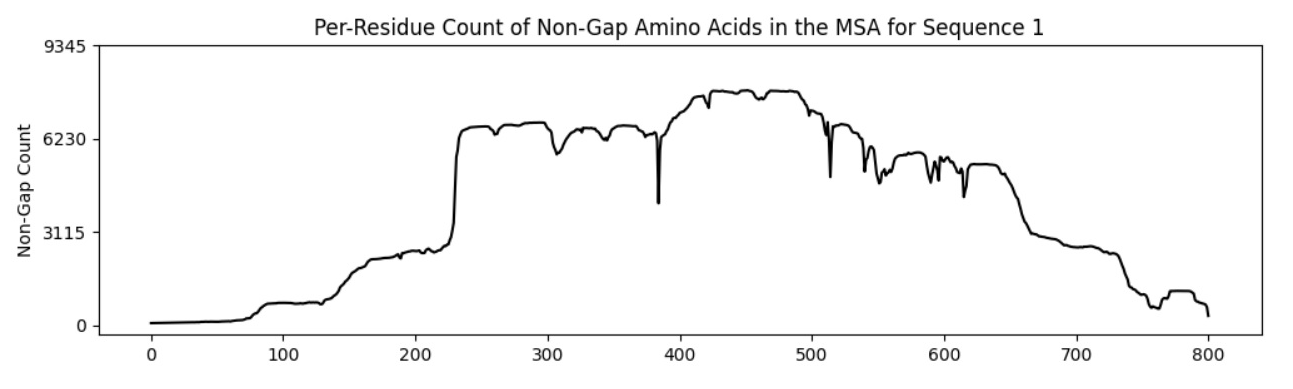

Структура белка, предсказанная AlphaFold, выглядит так:

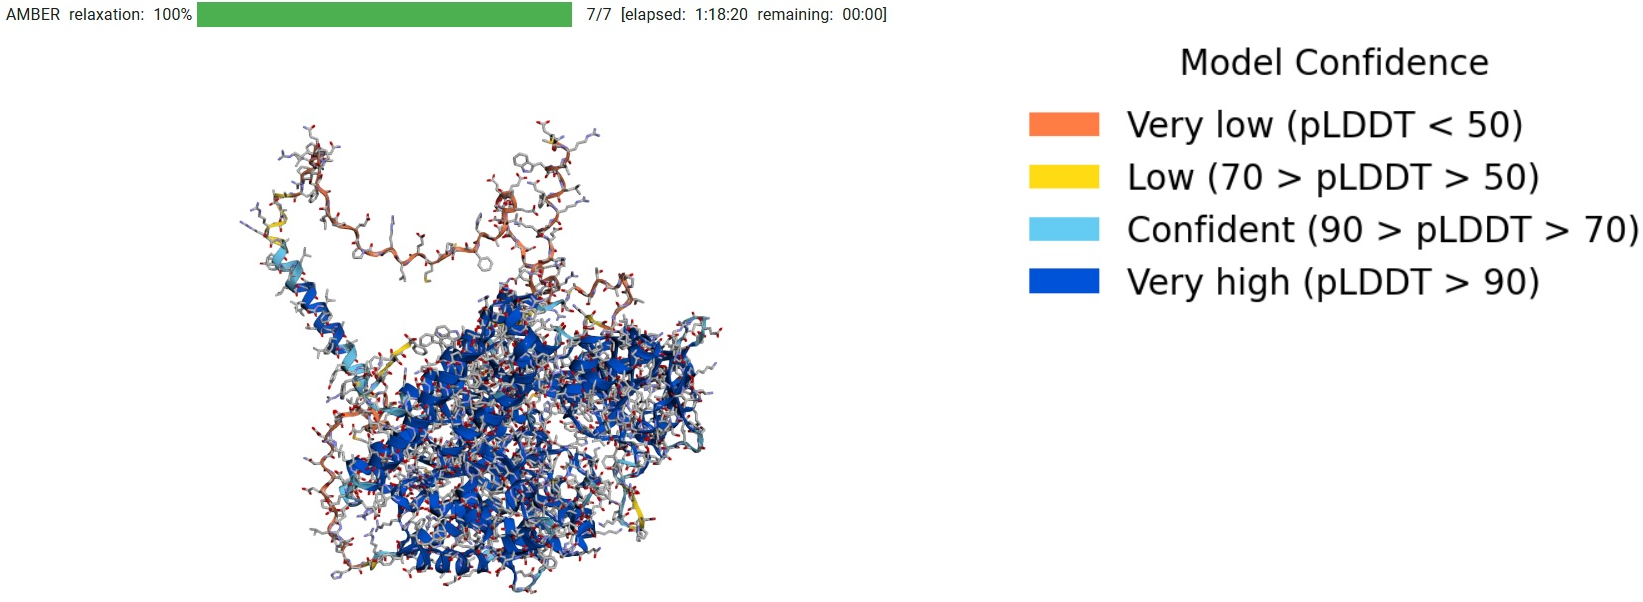

В целом видим, что основная структура белка предсказан нормально (темно синий цвет), и по краям есть участки с низкой уверенностью. Графики оценки качества модели это подтверждают.

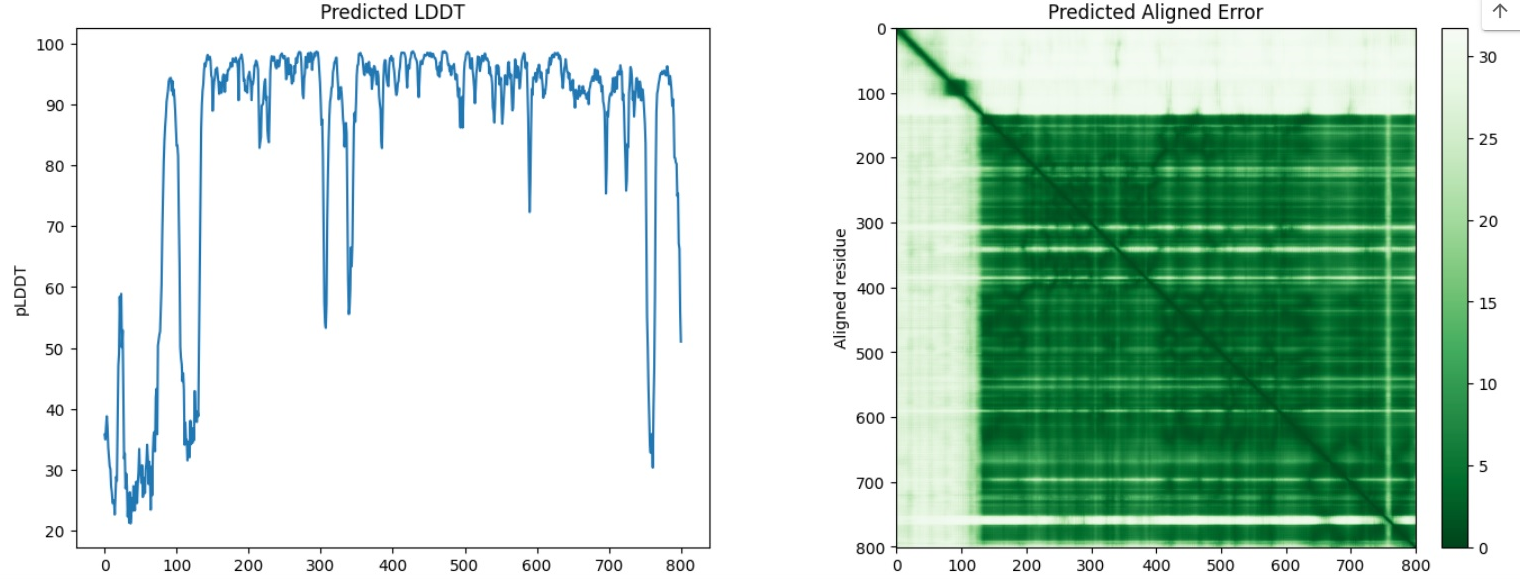

Попробуем предсказать структуру белка, используя сайт https://swissmodel. 

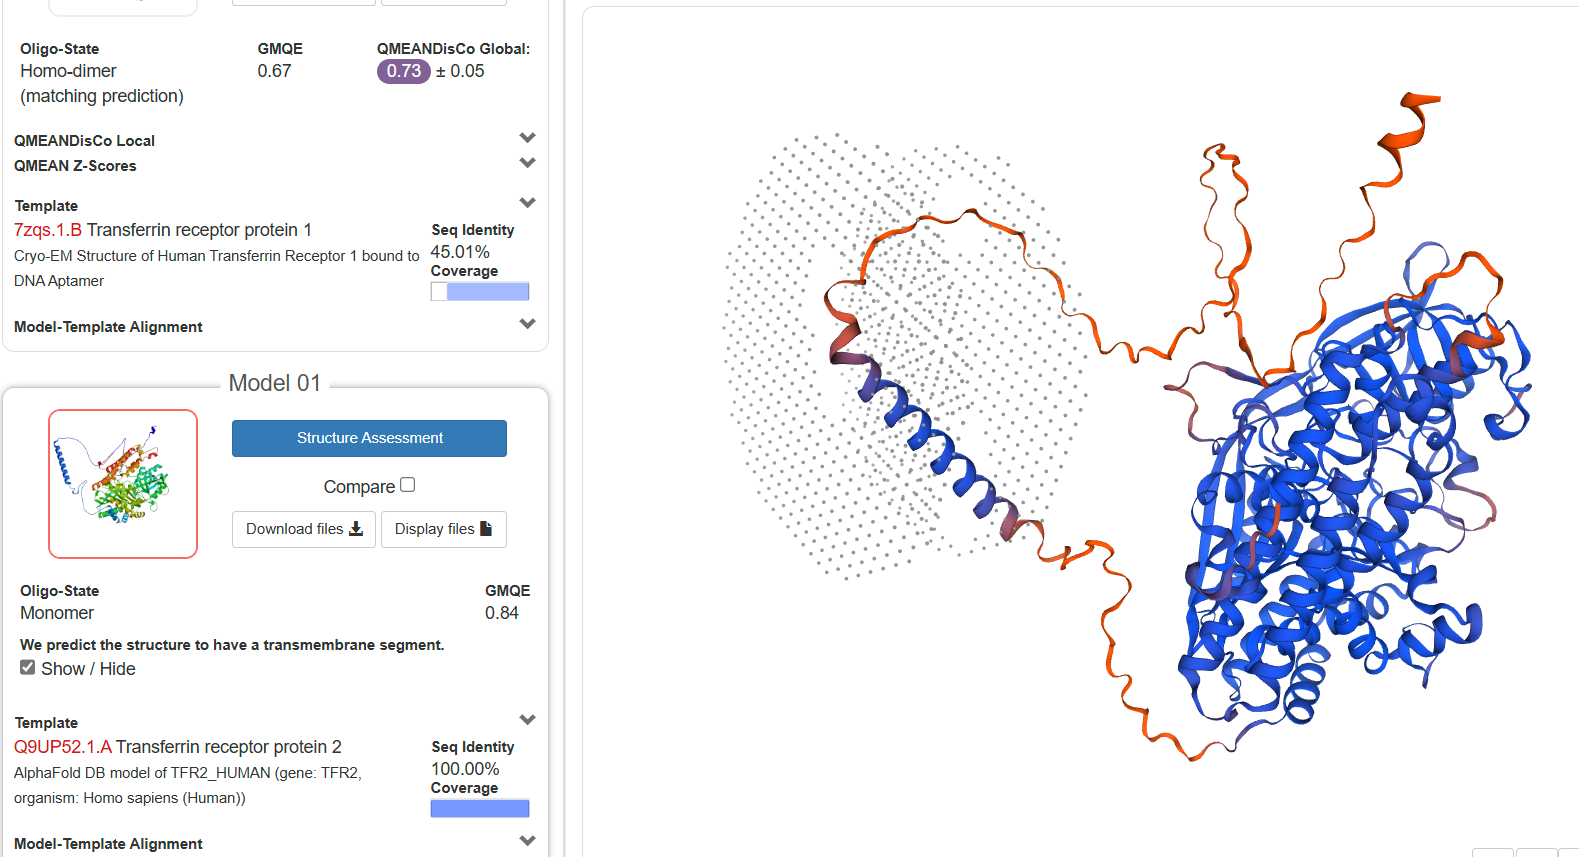

На мой неопытный взгляд, внешне структуры, предсказанные разными сайтами, похожи. Кроме того swissmodel дает ближайший по совпадению шаблон, точность предмказания относительно которого составляет 0,84.

In [39]:
genes_df.to_csv('genes3.csv', index=False)